## Exercícios para iniciar o Capítulo 4

Hora de praticar um pouco. Resolva as questões a seguir e consulte a documentação Python se necessário! 

A solução será apresentada no próximo capítulo.

In [81]:
from platform import python_version
print('Versão do Python utilizado neste exercício:', python_version())

Versão do Python utilizado neste exercício: 3.11.1


In [82]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib inline: renderiza os gráficos no próprio notebook

In [83]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "gustavogzr" --iversions

Author: gustavogzr

matplotlib: 3.7.2
numpy     : 1.25.2
pandas    : 2.0.3



In [84]:
# O dataset contém registros de corridas de táxi
df = pd.read_csv('.arquivos_DSA/dados/dataframe.csv', parse_dates = ['Data'], usecols = list(range(0,6)))
# parse_dates: converte a coluna 'Data' para datetime
# usecols: carrega apenas as colunas de 0 a 5

In [85]:
df.dtypes

Data          datetime64[ns]
Distancia            float64
Tempo                 object
Segundos             float64
Minutos              float64
Min_Por_Km           float64
dtype: object

In [86]:
df.sort_index(inplace = True) # Ordena o dataframe pelo índice
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
0,2015-08-02,1.70,NaN,NaN,NaN,NaN
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
2,2015-08-04,2.10,NaN,NaN,NaN,NaN
3,2015-08-06,2.38,NaN,NaN,NaN,NaN
4,2015-08-07,2.30,NaN,NaN,NaN,NaN


In [87]:
df.tail()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
76,2015-12-24,3.05,0:25:08,1508.0,25.133333,8.240437
77,2015-12-25,14.80,2:20:00,8400.0,140.000000,9.459459
78,2015-12-26,5.20,NaN,NaN,NaN,NaN
79,2015-12-30,3.15,0:22:10,1330.0,22.166667,7.037037
80,2016-01-01,26.20,4:20:43,15643.0,260.716667,9.951018


In [88]:
df.sample(10)

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km
72,2015-12-19,3.10,0:26:15,1575.0,26.250000,8.467742
32,2015-09-08,3.05,0:23:11,1391.0,23.183333,7.601093
41,2015-09-29,3.05,0:21:55,1315.0,21.916667,7.185792
43,2015-10-04,1.87,NaN,NaN,NaN,NaN
35,2015-09-16,3.05,0:22:48,1368.0,22.800000,7.475410
1,2015-08-03,1.40,NaN,NaN,NaN,NaN
75,2015-12-23,5.63,0:51:50,3110.0,51.833333,9.206631
59,2015-11-09,3.05,0:22:36,1356.0,22.600000,7.409836
53,2015-11-02,1.37,0:08:43,523.0,8.716667,6.362530
11,2015-08-14,0.90,0:06:16,376.0,6.266667,6.962963


In [89]:
# Exercício 1 - Qual o valor máximo da coluna Minutos?
df['Minutos'].max() # exibe o valor máximo da coluna 'Minutos'

260.71666666666664

In [90]:
# Exercício 2 - Qual o valor mínimo de distância acima de 2.0?
df[df['Distancia'] > 2.0]['Distancia'].min() # exibe o valor mínimo de distância acima de 2.0

2.01

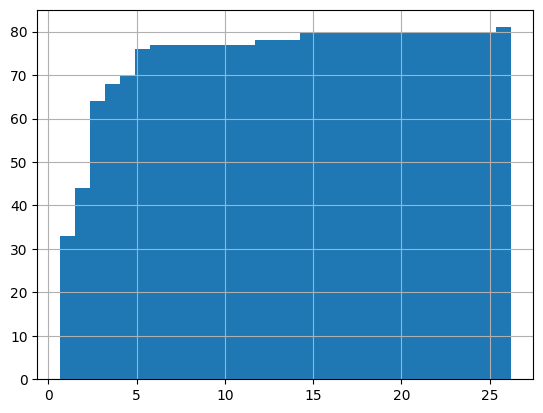

In [91]:
# Exercício 3 - Crie um plot com a frequência acumulada da coluna Distancia.
df['Distancia'].hist(cumulative = True, bins = 30) # cria um histograma com a frequência acumulada da coluna 'Distancia'
plt.show()

In [92]:
# Exercício 4 - Qual o dia da semana no índice de posição zero?
print(df['Data'].dt.day_name()[0]) # exibe o dia da semana do índice de posição zero
print(df['Data'].dt.weekday[0]) # exibe o dia da semana do índice de posição zero

# Opção alternativa:
print(df['Data'][0].strftime('%A')) # exibe o dia da semana do índice de posição zero

Sunday
6
Sunday


In [93]:
# Exercício 5 - Qual o dia da semana nos índices nas 5 primeiras posições?
df['Data'].dt.day_name().head() # exibe o dia da semana nos índices nas 5 primeiras posições

# Opção alternativa:
df['Data'].map(lambda x: x.strftime('%A')).head() # exibe o dia da semana nos índices nas 5 primeiras posições

0      Sunday
1      Monday
2     Tuesday
3    Thursday
4      Friday
Name: Data, dtype: object

In [94]:
# Exercício 6 - Extraia todos os dias da semana (em formato texto) e insira em uma nova coluna no dataframe df.
df['Dia da Semana'] = df['Data'].dt.day_name() # cria uma nova coluna 'Dia da Semana' com o dia da semana
df.head()

,Data,Distancia,Tempo,Segundos,Minutos,Min_Por_Km,Dia da Semana
0,2015-08-02,1.70,NaN,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,NaN,Friday


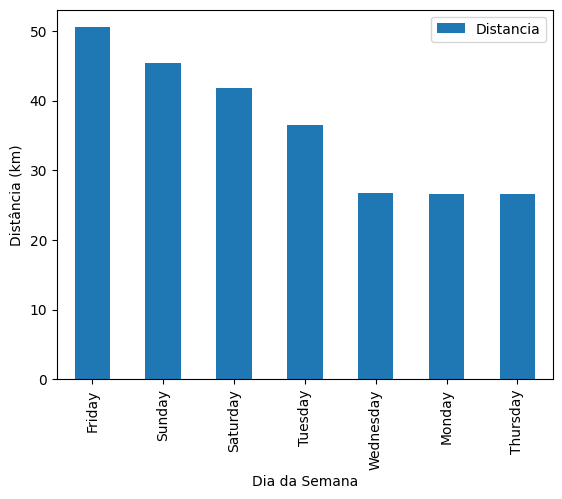

In [96]:
# Exercício 7 - Crie um gráfico de barras com o total da distância percorrida em cada dia da semana.
df_group_per_day_of_week = df[['Distancia', 'Dia da Semana']].groupby('Dia da Semana').sum() # agrupa o dataframe pela coluna 'Dia da Semana' e soma a distância percorrida
df_group_per_day_of_week = df_group_per_day_of_week.sort_values(by='Distancia', ascending=False) # ordena o dataframe
df_group_per_day_of_week.plot(kind = 'bar') # cria um gráfico de barras com o total da distância percorrida em cada dia da semana
plt.xlabel('Dia da Semana') # adiciona um rótulo ao eixo x
plt.ylabel('Distância (km)') # adiciona um rótulo ao eixo y
plt.show()

In [97]:
# Exercício 8 - Delete a coluna Tempo do dataframe df.
df.drop('Tempo', axis = 1, inplace = True) # deleta a coluna 'Tempo' do dataframe
df.head()

# Opção alternativa:
# del(df['Tempo']) # deleta a coluna 'Tempo' do dataframe

,Data,Distancia,Segundos,Minutos,Min_Por_Km,Dia da Semana
0,2015-08-02,1.70,NaN,NaN,NaN,Sunday
1,2015-08-03,1.40,NaN,NaN,NaN,Monday
2,2015-08-04,2.10,NaN,NaN,NaN,Tuesday
3,2015-08-06,2.38,NaN,NaN,NaN,Thursday
4,2015-08-07,2.30,NaN,NaN,NaN,Friday


Dia da Semana
Saturday     15
Sunday       14
Tuesday      14
Monday       11
Wednesday    11
Friday        8
Thursday      8
Name: Distancia, dtype: int64


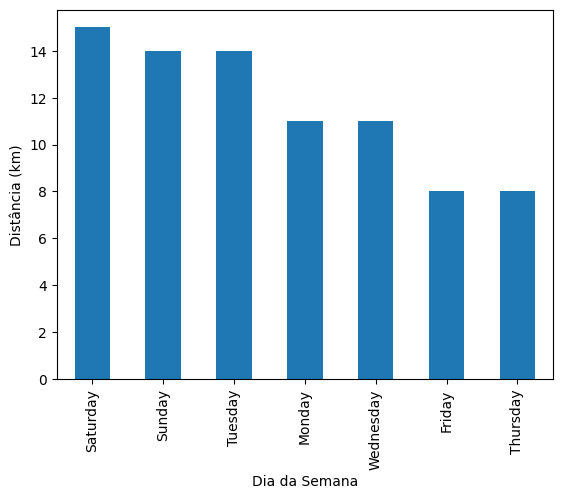

In [98]:
# Exercício 9 - Qual o total de corridas de taxi por dia da semana?
df_group_per_day_of_week = df.groupby('Dia da Semana')['Distancia'].count() # agrupa o dataframe pela coluna 'Dia da Semana' e conta o total de corridas
df_group_per_day_of_week = df_group_per_day_of_week.sort_values(ascending=False) # ordena o dataframe
print(df_group_per_day_of_week) # exibe o total de corridas de táxi por dia da semana
df_group_per_day_of_week.plot(kind = 'bar') # cria um gráfico de barras com o total da distância percorrida em cada dia da semana
plt.xlabel('Dia da Semana') # adiciona um rótulo ao eixo x
plt.ylabel('Distância (km)') # adiciona um rótulo ao eixo y
plt.show()

In [99]:
# Exercício 10 - Qual a média para cada uma das colunas por dia da semana? 
df_group_geral = df[['Dia da Semana', 
                     'Distancia',
                     'Segundos', 
                     'Minutos',
                     'Min_Por_Km']].groupby('Dia da Semana').mean() # agrupa o dataframe pela coluna 'Dia da Semana' e calcula a média
df_group_geral # exibe a média para cada uma das colunas por dia da semana

,Distancia,Segundos,Minutos,Min_Por_Km
Dia da Semana,,,,
Friday,6.315000,5071.800000,84.530000,8.039543
Monday,2.422727,1185.750000,19.762500,7.463840
Saturday,2.786000,1458.500000,24.308333,7.747657
Sunday,3.246429,2802.500000,46.708333,8.184961
Thursday,3.315000,1681.285714,28.021429,7.829348
Tuesday,2.607143,1334.600000,22.243333,7.463291
Wednesday,2.428182,1306.250000,21.770833,7.659706
